# Loading Dataset

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("data/heart.csv")

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **A. Data Cleaning**

## **Dropping Irrelevant Columns**

In [4]:
df.drop(['id'], axis=1, inplace =True)

## **Handling Missing Values**

In [5]:
# Checking for missing values
df.isnull().sum().sort_values(ascending = False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

In [6]:
# Impute missing numerical values with the median
num_imputer = SimpleImputer(strategy='median')
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

In [7]:
# Impute missing categorical values with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [8]:
# Feature Scaling
scaler = StandardScaler()
scaled_cols = numerical_cols.drop('num', errors='ignore')  # Exclude target variable if present
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [9]:
#Preparing Target Variable
# Ensure the target variable is binary for classification (if necessary)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [10]:
# Splitting the Dataset into Training and Testing Sets
X = df.drop(columns=['num'])
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing complete. Data is ready for model training.")

Preprocessing complete. Data is ready for model training.


In [11]:
# Checking for missing values after data cleaning
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


# **B. Exploratory Data Analysis**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

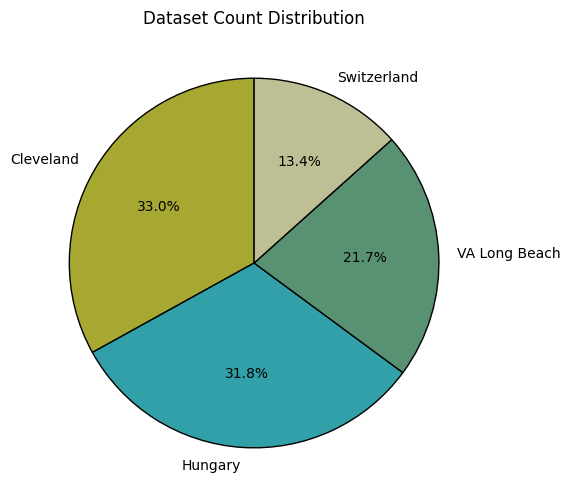

In [13]:
# Count of dataset from different states

plt.figure(figsize=(6, 6))
df_count = df['dataset'].value_counts()
plt.pie(df_count, 
        labels=df_count.index, 
        autopct='%1.1f%%', startangle=90, 
        colors=['#a6a832','#32a0a8', '#599173', '#bfbf95'],
       wedgeprops = {'edgecolor':'black'})
plt.title('Dataset Count Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


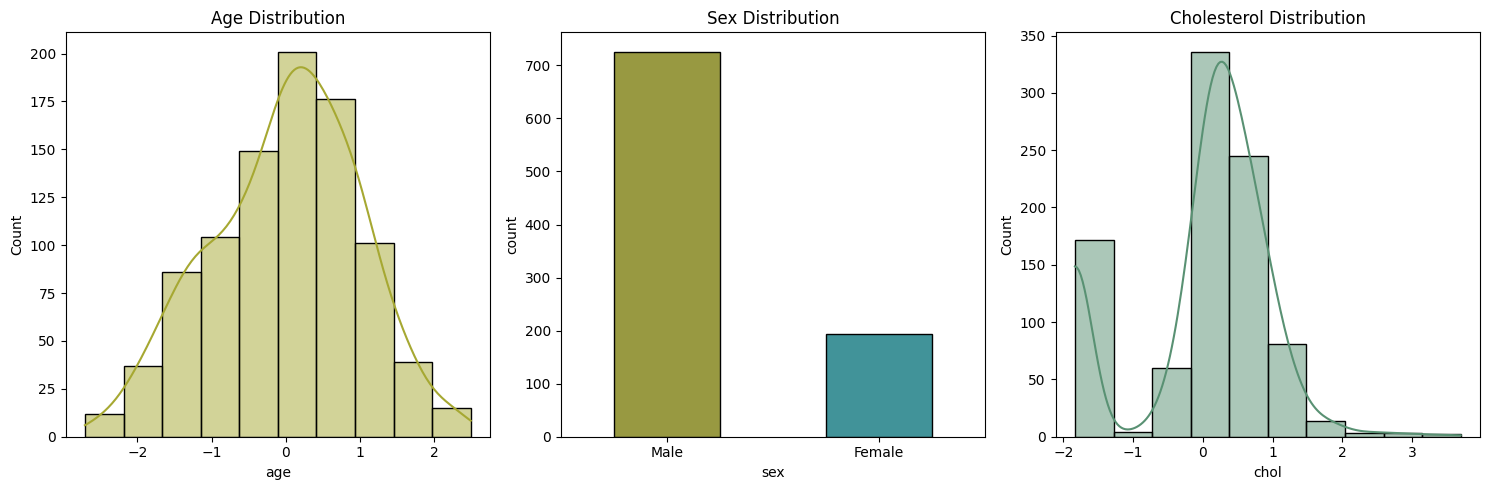

In [14]:
# Distribution of different features

custom_palette = ['#a6a832', '#32a0a8', '#599173', '#bfbf95']
plt.figure(figsize=(15,5))

#Distribution of Age
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, bins=10, color='#a6a832',edgecolor='black')
plt.title('Age Distribution')

#Distribution of sex
plt.subplot(1, 3, 2)
sns.countplot(x='sex', data=df, palette=custom_palette, width=0.5,edgecolor='black')
plt.title('Sex Distribution')

#Distribution of Cholesterol
plt.subplot(1, 3, 3)
sns.histplot(df['chol'], kde=True, bins=10, color='#599173',edgecolor='black')
plt.title('Cholesterol Distribution')

plt.tight_layout()
plt.show()

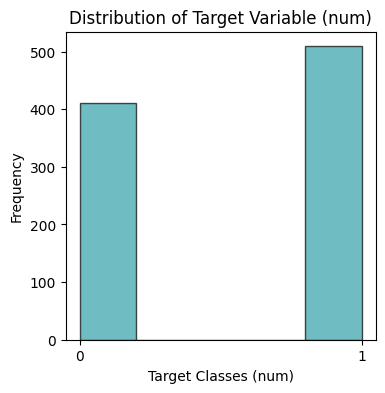

In [15]:
#Plotting the distribution of the target variable(num)

plt.figure(figsize=(4, 4))
plt.hist(df['num'], bins=5, color='#32a0a8', edgecolor='black', alpha=0.7)
plt.title('Distribution of Target Variable (num)')
plt.xlabel('Target Classes (num)')
plt.xticks(ticks=[0, 1])  
plt.ylabel('Frequency')
plt.show()

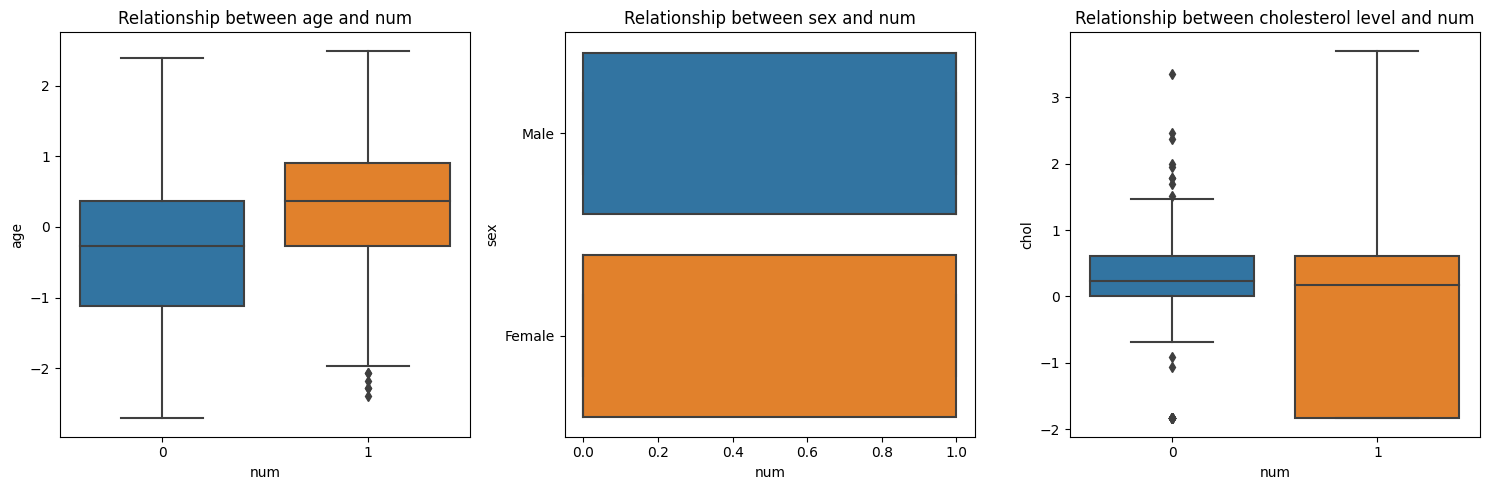

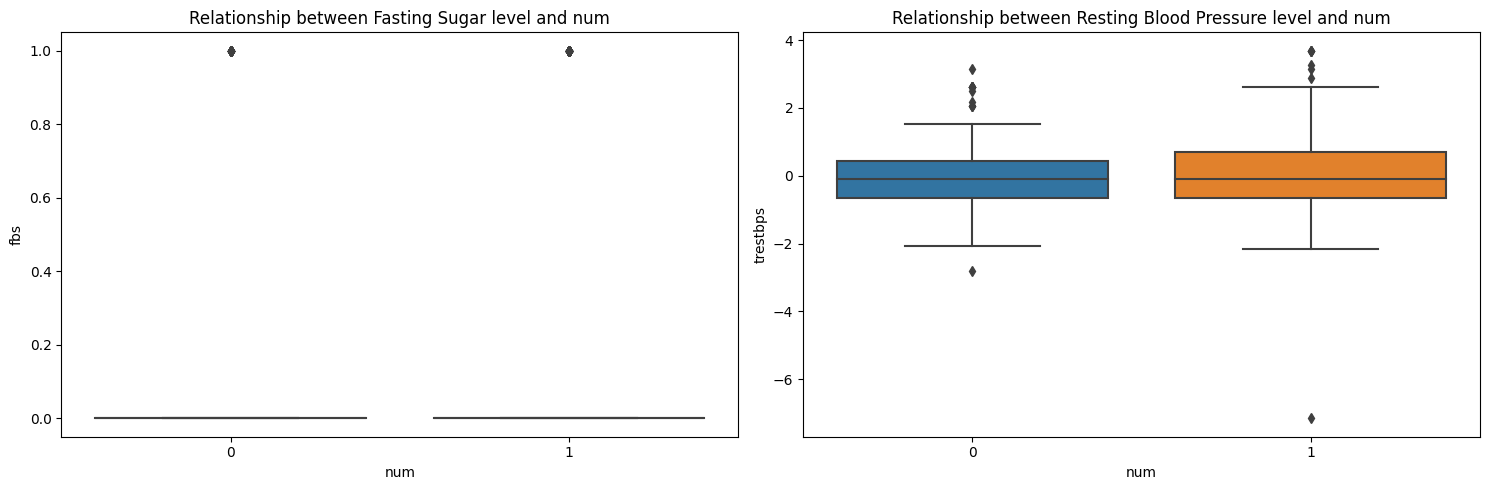

In [16]:
#Relationship between age and num
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='num', y='age', data=df)
plt.title('Relationship between age and num')

#Relationship between sex and num
plt.subplot(1, 3, 2)
sns.boxplot(x='num', y='sex', data=df)
plt.title('Relationship between sex and num')

#Relationship between cholesterol level and num
plt.subplot(1, 3, 3)
sns.boxplot(x='num', y='chol', data=df)
plt.title('Relationship between cholesterol level and num')
plt.tight_layout()
plt.show()

#Relationship between Fasting Sugar level and num
plt.figure(figsize =(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='num', y='fbs', data=df)
plt.title('Relationship between Fasting Sugar level and num')

#Relationship between Resting Blood Pressure level and num
plt.subplot(1, 2, 2)
sns.boxplot(x='num', y='trestbps', data=df)
plt.title('Relationship between Resting Blood Pressure level and num')


plt.tight_layout()
plt.show()

In [17]:
# Calculating the average and median values for resting blood pressure (trestbps)
avg_trestbps = df['trestbps'].mean()
median_trestbps = df['trestbps'].median()

# Calculating the average and median values for serum cholesterol (chol)
avg_chol = df['chol'].mean()
median_chol = df['chol'].median()

# Calculating the average and median values for fasting blood sugar level (fbs)
avg_fbs = df['fbs'].mean()
median_fbs = df['fbs'].median()

# Displaying the results
from tabulate import tabulate

# Data for tabulate
data = [
    ["Resting Blood Pressure (trestbps)", f"{avg_trestbps:.2f}", median_trestbps],
    ["Serum Cholesterol (chol)", f"{avg_chol:.2f}", median_chol],
    ["Fasting Blood Sugar Level (fbs)", f"{avg_fbs:.2f}", median_fbs],
]

# Print the tabulated results
print(tabulate(data, headers=["Metric", "Average", "Median"], tablefmt="fancy_grid"))

╒═══════════════════════════════════╤═══════════╤═══════════╕
│ Metric                            │   Average │    Median │
╞═══════════════════════════════════╪═══════════╪═══════════╡
│ Resting Blood Pressure (trestbps) │     -0    │ -0.108217 │
├───────────────────────────────────┼───────────┼───────────┤
│ Serum Cholesterol (chol)          │     -0    │  0.211884 │
├───────────────────────────────────┼───────────┼───────────┤
│ Fasting Blood Sugar Level (fbs)   │      0.15 │  0        │
╘═══════════════════════════════════╧═══════════╧═══════════╛


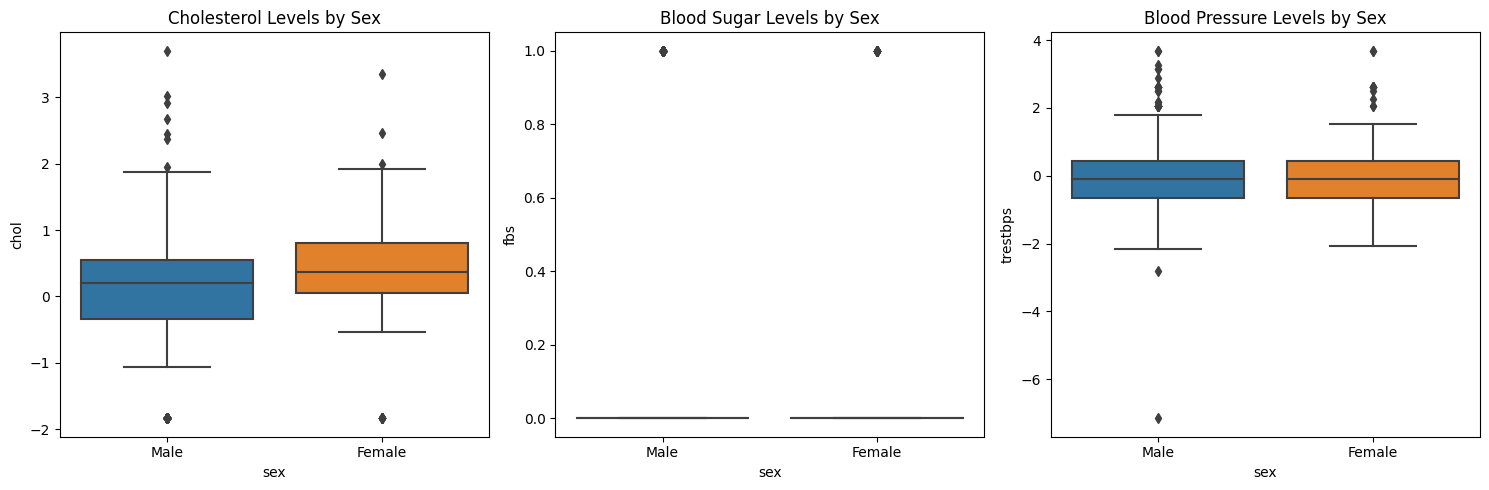

In [18]:
# Analysis between sex and 3 variables (cholesterol, blood sugar level and pressure level)

#Sex vs Cholesterol level
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='chol', data=df)
plt.title('Cholesterol Levels by Sex')

#Sex vs Blood Sugar Level
plt.subplot(1, 3, 2)
sns.boxplot(x='sex', y='fbs', data=df)
plt.title('Blood Sugar Levels by Sex')

#Sex vs Blood Pressure Level
plt.subplot(1, 3, 3)
sns.boxplot(x='sex', y='trestbps', data=df)
plt.title('Blood Pressure Levels by Sex')


plt.tight_layout()
plt.show()

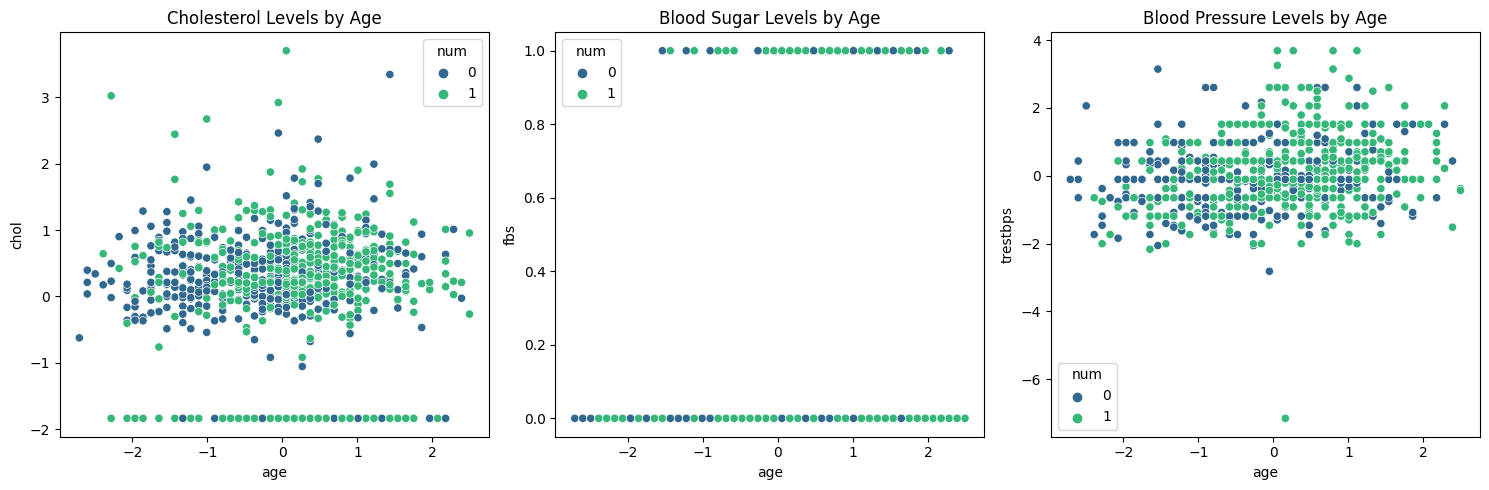

In [19]:
# Analysis between Age vs. Cholesterol, Blood Sugar, Blood Pressure

plt.figure(figsize=(15, 5))

#Age vs Cholesterol
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='chol', data=df,hue=df['num'], palette='viridis')
plt.title('Cholesterol Levels by Age')

#Age vs Blood Sugar
plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='fbs', data=df,hue=df['num'], palette='viridis')
plt.title('Blood Sugar Levels by Age')

#Age vs Blood Pressure
plt.subplot(1, 3, 3)
sns.scatterplot(x='age', y='trestbps', data=df,hue=df['num'], palette='viridis')
plt.title('Blood Pressure Levels by Age')
plt.tight_layout()
plt.show()

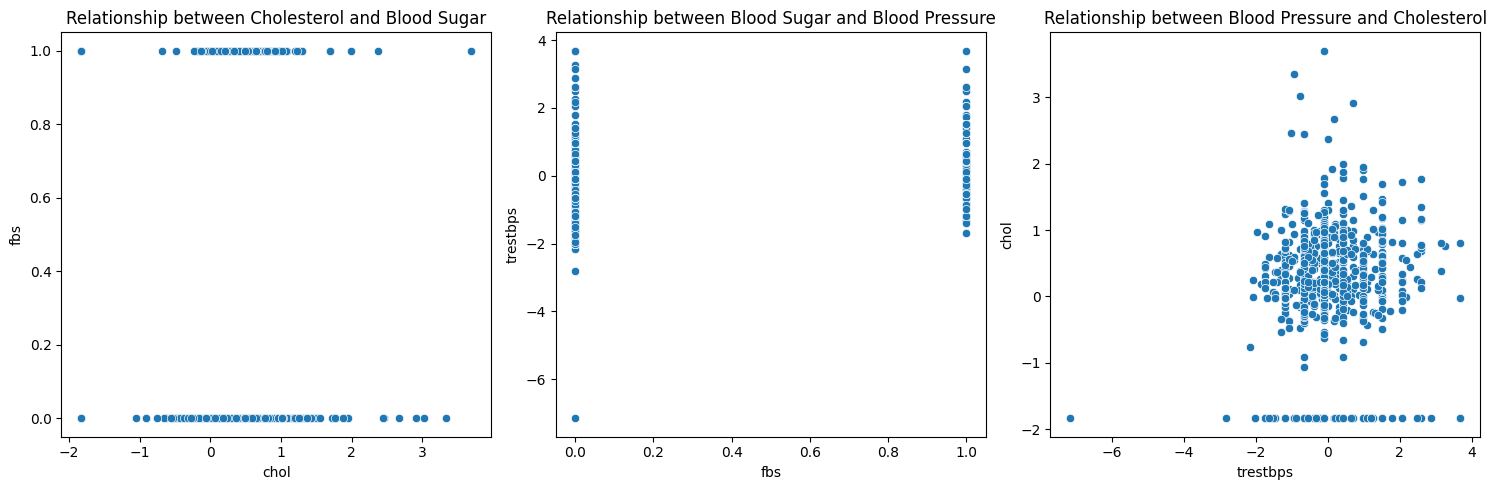

In [20]:
plt.figure(figsize=(15, 5))

# Releationship between cholesterol and sugar
plt.subplot(1,3,1)
sns.scatterplot(x='chol', y='fbs', data=df,)
plt.title('Relationship between Cholesterol and Blood Sugar')

# Relationship between sugar and blood pressure
plt.subplot(1,3,2)
sns.scatterplot(x='fbs', y='trestbps', data=df)
plt.title('Relationship between Blood Sugar and Blood Pressure')

# Relationship between blood pressure and cholesterol
plt.subplot(1,3,3)
sns.scatterplot(x='trestbps', y='chol', data=df)
plt.title('Relationship between Blood Pressure and Cholesterol')

plt.tight_layout()
plt.show()

# **C. Machine Learning**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings(action="ignore")
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, accuracy_score

In [22]:
#Encoding Categorical Variables
label_encoder = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col]=le

In [23]:
# Defining features (X) and target (y)

X = df.drop('num', axis=1)
y = df['num']

In [24]:
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# Automatically detect numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns in case train and test sets have different categories
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [25]:
# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [26]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
}

for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        75
           1       0.86      0.84      0.85       109

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

Training Decision Tree...
Decision Tree Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        75
           1       0.83      0.77      0.80       109

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.77      0.77       184

Training Random Forest...
Random Forest Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        75
           1       0.90      0.85      0.88       109

    a